In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
class ClassificationTest:
    def __init__(self, x_data, t_data, learning_rate, iteration_count):
        self.x_data = x_data
        self.t_data = t_data
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.x_data.shape[1], 1)
        self.b = np.random.rand(1)
        
        self.loss_val_list = []
        
        print("ClassificationTest Object is created.\n")
        
    def get_W_b(self):
        return self.W, self.b
        
    def __loss_func(self):
        z = np.dot(self.x_data, self.W) + self.b
        y = sigmoid(z)
    
        return (np.sum((self.t_data - y)**2)) / (len(self.x_data))    
    # 손실함수 값 계산 함수
    # 입력변수 x, t : numpy type
    def __loss_val(self):
        z = np.dot(self.x_data, self.W) + self.b
        y = sigmoid(z)
    
        return (np.sum((self.t_data - y)**2)) / (len(self.x_data))    

    def train(self):
        f = lambda x : self.__loss_func()
        
        print("Initial error value = ", self.__loss_val() , "\n", "Initial W = ", self.W, "\n", ", b = ", self.b)

        start_time = datetime.now()

        for step in range(self.iteration_count):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if step % 1000 == 0:
                print("step = ", step, "loss value = ", self.__loss_val())
                self.loss_val_list.append(self.__loss_val())
        
        end_time = datetime.now()

        print("")
        print("Elapsed Time => ", end_time - start_time)
        
    def display_lossval_trend(self):
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        plt.plot(self.loss_val_list, ls='--', lw=2, label='lr={}, epoch={}'.format(self.learning_rate, self.iteration_count))
        plt.legend(loc='best')

        plt.show()
    
    # 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
    # 입력변수 x : numpy type
    def predict(self, test_data):
        z = np.dot(test_data, self.W) + self.b
        y = sigmoid(z)
        
        if y >= 0.5:
            result = 1
        else:
            result = 0
    
        return y, result

In [5]:
try:
    x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10, 1)
    t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10, 1)

    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

except FileNotFoundError as err:
    print(str(err))
except IndexError as err:
    print(str(err))
except Exception as err:
    print(str(err))

x_data.ndim =  2 , x_data.shape =  (10, 1)
t_data.ndim =  2 , t_data.shape =  (10, 1)


In [6]:
obj = ClassificationTest(x_data, t_data, 1e-1, 20001)
obj.train()

ClassificationTest Object is created.

Initial error value =  11.974518975085063 
 Initial W =  [[0.5488135]] 
 , b =  [0.71518937]
step =  0 loss value =  27.863662731540508
step =  1000 loss value =  0.632674094626388
step =  2000 loss value =  0.12766853313190404
step =  3000 loss value =  0.11895314613766853
step =  4000 loss value =  0.11139507245005922
step =  5000 loss value =  0.10476729645935566
step =  6000 loss value =  0.09890104150691327
step =  7000 loss value =  0.09366760947361322
step =  8000 loss value =  0.08896677608385663
step =  9000 loss value =  0.0847190927748569
step =  10000 loss value =  0.08086061637156261
step =  11000 loss value =  0.07733920237919427
step =  12000 loss value =  0.0741118366806432
step =  13000 loss value =  0.07114267544831922
step =  14000 loss value =  0.06840157946386861
step =  15000 loss value =  0.06586300075713776
step =  16000 loss value =  0.06350512493605955
step =  17000 loss value =  0.061309202135547844
step =  18000 loss va

In [7]:
obj1 = ClassificationTest(x_data, t_data, 1e-2, 20001)
obj1.train()

ClassificationTest Object is created.

Initial error value =  12.515506999781792 
 Initial W =  [[0.60276338]] 
 , b =  [0.54488318]
step =  0 loss value =  9.253782781201112
step =  1000 loss value =  1.0769316083698528
step =  2000 loss value =  0.786476471453669
step =  3000 loss value =  0.6588199487813373
step =  4000 loss value =  0.5823921795683434
step =  5000 loss value =  0.5297124226684985
step =  6000 loss value =  0.4903422413675966
step =  7000 loss value =  0.45933357685738835
step =  8000 loss value =  0.4339959549639045
step =  9000 loss value =  0.412722178461071
step =  10000 loss value =  0.3944838720002332
step =  11000 loss value =  0.37858756231572505
step =  12000 loss value =  0.3645458262988529
step =  13000 loss value =  0.35200437141806395
step =  14000 loss value =  0.3406984254065923
step =  15000 loss value =  0.33042544454442424
step =  16000 loss value =  0.3210273739635761
step =  17000 loss value =  0.312378739312919
step =  18000 loss value =  0.3043

In [8]:
obj2 = ClassificationTest(x_data, t_data, 1e-1, 20001)
obj2.train()

ClassificationTest Object is created.

Initial error value =  9.569460086371842 
 Initial W =  [[0.4236548]] 
 , b =  [0.64589411]
step =  0 loss value =  28.001979769364056
step =  1000 loss value =  1.0278362228381723
step =  2000 loss value =  0.1276537232001611
step =  3000 loss value =  0.11894038150553615
step =  4000 loss value =  0.11138393566981791
step =  5000 loss value =  0.10475748137152886
step =  6000 loss value =  0.09889231726414904
step =  7000 loss value =  0.09365979799093706
step =  8000 loss value =  0.08895973732121899
step =  9000 loss value =  0.08471271479995521
step =  10000 loss value =  0.08085480845409061
step =  11000 loss value =  0.07733389007094281
step =  12000 loss value =  0.07410695823435928
step =  13000 loss value =  0.07113817916131165
step =  14000 loss value =  0.06839742167473775
step =  15000 loss value =  0.06585914431225277
step =  16000 loss value =  0.06350153800031756
step =  17000 loss value =  0.061305857258907415
step =  18000 loss v

In [6]:
obj7 = ClassificationTest(x_data, t_data, 1e-1, 100001)
obj7.train()

ClassificationTest Object is created.

Initial error value =  11.974518975085063 
 Initial W =  [[0.5488135]] 
 , b =  [0.71518937]
step =  0 loss value =  27.863662731540508
step =  1000 loss value =  0.632674094626388
step =  2000 loss value =  0.12766853313190404
step =  3000 loss value =  0.11895314613766853
step =  4000 loss value =  0.11139507245005922
step =  5000 loss value =  0.10476729645935566
step =  6000 loss value =  0.09890104150691327
step =  7000 loss value =  0.09366760947361322
step =  8000 loss value =  0.08896677608385663
step =  9000 loss value =  0.0847190927748569
step =  10000 loss value =  0.08086061637156261
step =  11000 loss value =  0.07733920237919427
step =  12000 loss value =  0.0741118366806432
step =  13000 loss value =  0.07114267544831922
step =  14000 loss value =  0.06840157946386861
step =  15000 loss value =  0.06586300075713776
step =  16000 loss value =  0.06350512493605955
step =  17000 loss value =  0.061309202135547844
step =  18000 loss va

In [17]:
obj7.predict(np.array([13]))

(array([0.51950518]), 1)

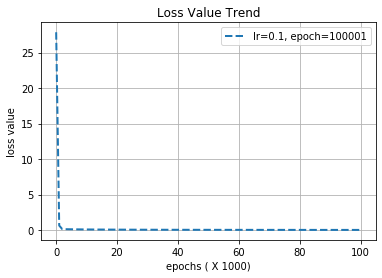

In [9]:
obj7.display_lossval_trend()